# Question No.1. Vision Dataset

> ## imagenette/160px-v2





## 1. Import Libraries/Dataset (0 mark)

In [ ]:
import tensorflow as tf

from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow_datasets as tfds
from tensorflow.keras import regularizers
import tensorflow.keras as keras
from keras.preprocessing.image import ImageDataGenerator

import pathlib
import random
import numpy as np
import pandas as pd
import seaborn as sns
import operator
import os

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [ ]:
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-160.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='imagenette2-160', 
                                   untar=True)
data_dir = pathlib.Path(data_dir)

In [ ]:
train_image_count = len(list(data_dir.glob('train/*/*.JPEG')))
train_image_count

9469

In [ ]:
val_image_count = len(list(data_dir.glob('val/*/*.JPEG')))
val_image_count

3925

In [ ]:
# Get the train data directory path
train_dir = pathlib.Path(data_dir/'train')
train_dir

PosixPath('/root/.keras/datasets/imagenette2-160/train')

In [ ]:
#Get the validation data directory path
val_dir = pathlib.Path(data_dir/'val')
val_dir

PosixPath('/root/.keras/datasets/imagenette2-160/val')

Check the GPU available

In [ ]:
physical_devices = tf.config.list_physical_devices('GPU')
physical_devices

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## 2. Data Visualization and augmentation (1 mark)

**Plot atleast two samples from each class of dataset.**

In [ ]:
img_height=160
img_width=160
SEED_SIZE=42
batch_size=32

In [ ]:
# fetching training data from directory, from the `PosixPath` printed above
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="int",  # categorical, binary
    batch_size=batch_size,
    image_size=(img_height, img_width),  # reshape if not in this size
    shuffle=True,
    seed=SEED_SIZE
)
# fetching validation data from directory, from the `PosixPath` printed above
ds_validation = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    labels="inferred",
    label_mode="int",  # categorical, binary
    batch_size=batch_size,
    image_size=(img_height, img_width),  # reshape if not in this size
    shuffle=True,
    seed=SEED_SIZE
)


Found 9469 files belonging to 10 classes.
Found 3925 files belonging to 10 classes.


In [ ]:
# printing the names of the classes found in the directory 
class_names = ds_train.class_names
class_names

['n01440764',
 'n02102040',
 'n02979186',
 'n03000684',
 'n03028079',
 'n03394916',
 'n03417042',
 'n03425413',
 'n03445777',
 'n03888257']

*** Images for Class Name -  n01440764


<Figure size 720x720 with 0 Axes>

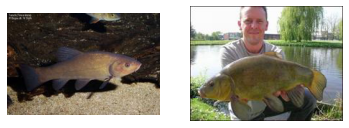

*** Images for Class Name -  n02102040


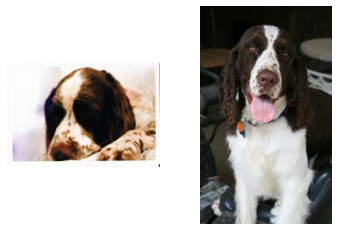

*** Images for Class Name -  n02979186


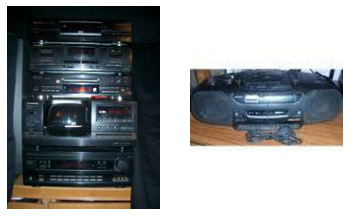

*** Images for Class Name -  n03000684


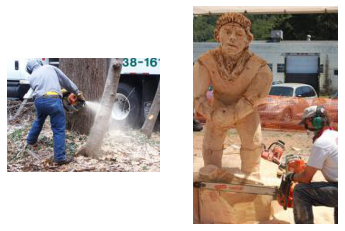

*** Images for Class Name -  n03028079


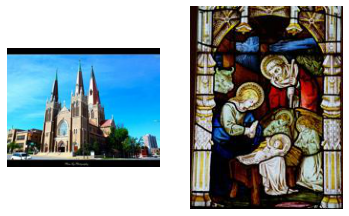

*** Images for Class Name -  n03394916


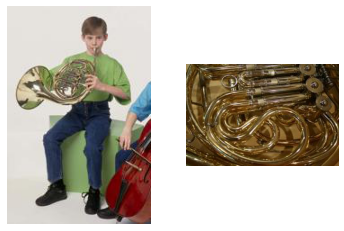

*** Images for Class Name -  n03417042


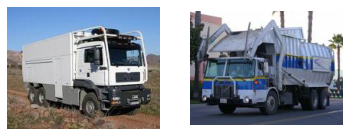

*** Images for Class Name -  n03425413


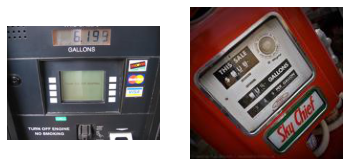

*** Images for Class Name -  n03445777


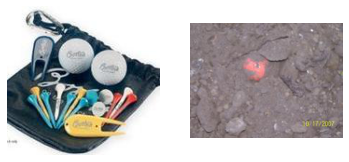

*** Images for Class Name -  n03888257


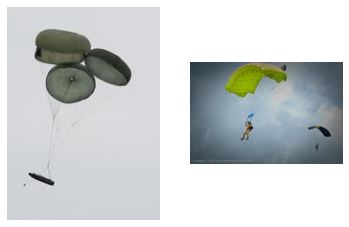

In [ ]:
# plotting the samples - 2 images from each class 
plt.figure(figsize=(10, 10))
for class_name in class_names:
  print("*** Images for Class Name - ", class_name)
  filePath = pathlib.Path(train_dir/class_name/os.listdir(train_dir/class_name)[0])
  filePath_Second = pathlib.Path(train_dir/class_name/os.listdir(train_dir/class_name)[1])
  image_1 = mpimg.imread(filePath)
  image_2 = mpimg.imread(filePath_Second)
  figure = plt.figure()
  figure.add_subplot(1, 2, 1)
  plt.imshow(image_1), plt.axis("off")
  figure.add_subplot(1, 2, 2)
  plt.imshow(image_2), plt.axis("off")
  plt.show()

**Apply rotation and height shift augmentation (rotation_range, height_shift_range) to the dataset separately. 
Print the augmented image and the original image for each class and each augmentation.**

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
# load and iterate training dataset
train_generator = train_datagen.flow_from_directory(train_dir,
                                              class_mode='categorical', 
                                              batch_size=batch_size,
                                              seed=SEED_SIZE,
                                              shuffle=True,
                                              target_size=(img_height, img_width),)
# load and iterate validation dataset
val_generator = val_datagen.flow_from_directory(val_dir,
                                            class_mode='categorical', 
                                            batch_size=batch_size,
                                            seed=SEED_SIZE,
                                            shuffle=True,target_size=(img_height, img_width),)

Found 9469 images belonging to 10 classes.
Found 3925 images belonging to 10 classes.




*   **Rotation Augmentation**
*   **Height Shift Augmentation**



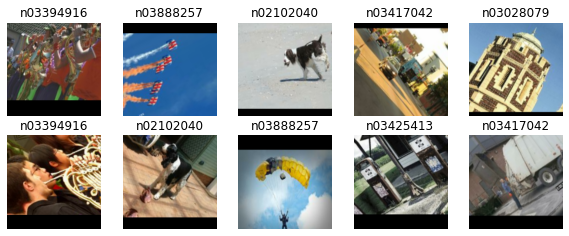

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomRotation(0.2), #Random Rotation
  layers.experimental.preprocessing.RandomTranslation(
    0.2, 0,fill_mode='constant') #Height Shift
])

# printing the augmented data with class names 
plt.figure(figsize=(10, 10))
for images, labels in ds_train.take(1):
  for i in range(10):
    image = tf.expand_dims(images[i], 0)
    augmented_image = data_augmentation(image)
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(augmented_image[0].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

**Bring the train and test data in the required format.**

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range=20,
        height_shift_range=0.2,
        shear_range=0.05,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0.20)

val_datagen = ImageDataGenerator(rescale=1 / 255.0)

In [ ]:
# load and iterate training dataset
train_generator = train_datagen.flow_from_directory(train_dir,
                                              class_mode='categorical', 
                                              batch_size=batch_size,
                                              seed=SEED_SIZE,
                                              shuffle=True,
                                              target_size=(img_height, img_width),)
# load and iterate validation dataset
val_generator = val_datagen.flow_from_directory(val_dir,
                                            class_mode='categorical', 
                                            batch_size=batch_size,
                                            seed=SEED_SIZE,
                                            shuffle=True,
                                            target_size=(img_height, img_width),)

Found 9469 images belonging to 10 classes.
Found 3925 images belonging to 10 classes.


**Print the shapes of train and test data.**

In [ ]:
#Shape of training data
images, labels = next(train_generator)
print(images.shape)
print(labels.shape)
train_shape = images.shape

(32, 160, 160, 3)
(32, 10)


In [ ]:
#Shape of validation data
images, labels = next(val_generator)
print(images.shape)
print(labels.shape)

(32, 160, 160, 3)
(32, 10)


## 3. Model Building (0.2*5 = 1 mark)

**Create Sequential model**

In [ ]:
# Create a model object
dnnModel = models.Sequential()

a. Sequential Model Layers - Use AT LEAST 3 hidden layers with appropriate input for each. Choose the best number for hidden units and give reasons.

**Rationale behind number of layers:** Ideally number of hidden neurons should be between the size of the input layer and the size of the output layer. Based on this we decided that total number should not cross 3072.
We added min 3 dense layers each with multiple of 10 neurons as industry standard.


b. Add L2 regularization to all the layers.

c. Add one layer of dropout at the appropriate position and give reasons.

d. Choose the appropriate activation function for all the layers.

e. Print the model summary.

In [ ]:
# Layer 1 = Flatten layer whose role is to convert each input image to a 1D array
dnnModel.add(keras.layers.Flatten(input_shape=[img_height,img_width, 3]))
# Layer 2 = input layer
# specify the input size in the first layer.
dnnModel.add(layers.Dense(1024, activation='relu'))

# Add dropout of 20% to layer 1
dnnModel.add(layers.Dropout(0.2))

# Layer 3 = hidden layer 
dnnModel.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)) )

# Layer 4 = hidden layer 
dnnModel.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)) )

# Layer 5 = hidden layer 
dnnModel.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)) )

# Layer 6 = output layer
dnnModel.add(layers.Dense(10, activation='softmax'))

dnnModel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 76800)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              78644224  
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [ ]:
dnnModel.layers

## 4. Model Compilation (0.25 mark)

**Compile the model**

**Rationale behind learning rate:** Small value of learning rate helps algorithm converge slowly, however, finds the optimum solution with possible global minima.
It's standard practice to use small value of learning rate starting with 0.001.

In [ ]:
# Available optimizer: adam, rmsprop, adagrad, sgd
# loss:  objective that the model will try to minimize. 
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error
# metrics: List of metrics to be evaluated by the model during training and testing. 

dnnModel.compile( optimizer = keras.optimizers.Adam(lr = 0.001), loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False), metrics=['accuracy'] )

## 5. Model Training (0.5 + 0.25 = 0.75 mark)

**Train the model**

In [ ]:
# custom callback creates to fetch the time of training model
from timeit import default_timer as timer

class TimingCallback(keras.callbacks.Callback):
    def __init__(self, logs={}):
        self.logs=[]
    def on_epoch_begin(self, epoch, logs={}):
        self.starttime = timer()
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(timer()-self.starttime)

cb = TimingCallback()

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=val_generator.n//val_generator.batch_size

# Training the model on train data

h = dnnModel.fit_generator(
    generator=train_generator,
    steps_per_epoch=STEP_SIZE_TRAIN,
    validation_data=val_generator,
    validation_steps=STEP_SIZE_VALID,
    epochs=50,
    callbacks=[cb]
)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
295/295 [==============================] - 76s 250ms/step - loss: 17.1731 - accuracy: 0.1389 - val_loss: 6.2016 - val_accuracy: 0.2339
Epoch 2/50
295/295 [==============================] - 73s 247ms/step - loss: 5.8494 - accuracy: 0.2393 - val_loss: 4.9860 - val_accuracy: 0.2943
Epoch 3/50
295/295 [==============================] - 73s 247ms/step - loss: 4.8069 - accuracy: 0.2567 - val_loss: 4.2315 - val_accuracy: 0.2818
Epoch 4/50
295/295 [==============================] - 73s 247ms/step - loss: 4.1266 - accuracy: 0.2704 - val_loss: 3.6570 - val_accuracy: 0.3189
Epoch 5/50
295/295 [==============================] - 73s 247ms/step - loss: 3.6253 - accuracy: 0.2873 - val_loss: 3.3445 - val_accuracy: 0.3040
Epoch 6/50
295/295 [==============================] - 73s 246ms/step - loss: 3.2424 - accuracy: 0.2923 - val_loss: 3.0366 - val_accuracy: 0.3225
Epoch 7/50
295/295 [==============================] - 73s 246ms/step - loss: 2.9498 - accuracy: 0.2983 - val_loss: 2.6897 - val_a

**Printing Accuracy**

In [ ]:
print('Final training loss \t', h.history['loss'][-1])
print('Final training accuracy ', h.history['accuracy'][-1])

Final training loss 	 1.798264741897583
Final training accuracy  0.3980078399181366


**Plot the training accuracy**

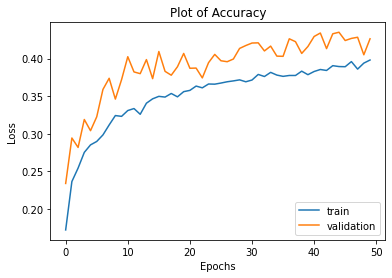

In [ ]:
plt.plot(h.history['accuracy'], label='train')
plt.plot(h.history['val_accuracy'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Accuracy')
plt.legend()
plt.show()

**Plot the training loss**

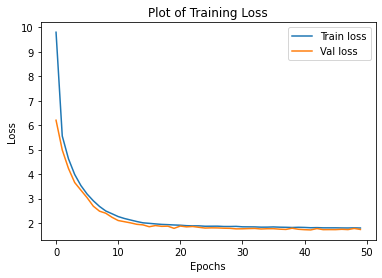

In [ ]:
plt.plot(h.history['loss'], label='Train loss')
plt.plot(h.history['val_loss'], label='Val loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Training Loss')
plt.legend()
plt.show()

**Print the total time taken for training **

In [ ]:
print("Total time taken for training -")
#Total time taken by model to train (in seconds)
print(sum(cb.logs))
print("\n")
#Time taken by each Epoch (in seconds)
print("Total time taken by each epoch during training -")
print(cb.logs)

Total time taken for training -
3596.802014764002


Total time taken by each epoch during training -
[76.26580347299989, 73.01670677300001, 72.99933839200003, 72.79736241500007, 72.74401392000004, 72.50401826199982, 72.598722426, 72.65421527900003, 72.57628556999998, 73.02184468799987, 74.15252091399998, 72.33267558499983, 72.09456008300003, 71.69302233200006, 71.84739811400004, 74.04151291799985, 73.00218881199999, 72.34580265799991, 72.47502771400013, 71.95567227600031, 71.80097632200022, 71.66090232900024, 72.34965525400003, 72.42189795200011, 72.15538731100014, 72.41098159700005, 72.41045900900008, 72.58691697299992, 72.70316135899975, 72.48600350100014, 71.8556776080004, 71.74175862100037, 71.11456431400029, 71.04808719099992, 70.71758818099988, 70.91106683399994, 70.76822269700006, 70.68649171700008, 70.5353672289998, 70.60029198599977, 70.77252989399994, 70.82439328700002, 71.04114717399989, 70.62950008100006, 70.89567588900036, 70.55459924500019, 70.35522774699984, 70.485876532

## 6. Model Evaluation (0.5 + 0.5 = 1 mark)

**Testing the model**

In [ ]:
# evaluating the model against validation data and printing scores
score = dnnModel.evaluate_generator(val_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Test loss: 1.7405354976654053
Test accuracy: 0.4254777133464813


**Print confusion matrix and classification report**

In [ ]:
#Confusion Matrix and Classification Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Y_pred = dnnModel.predict_generator(val_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('*** Confusion Matrix ***')
conf_matrix = confusion_matrix(val_generator.classes, y_pred)
print(conf_matrix)

print('*** Classification Report ***')
target_names = class_names
print(classification_report(val_generator.classes, y_pred, target_names=target_names))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


*** Confusion Matrix ***
[[36 65 40 54 25 50 57 15 26 19]
 [41 45 42 39 42 46 56 20 33 31]
 [34 44 41 50 38 43 43 20 26 18]
 [33 46 44 46 39 44 60 15 40 19]
 [26 77 48 48 37 49 44 17 33 30]
 [34 50 44 48 48 44 47 19 31 29]
 [31 60 44 52 40 40 50 25 27 20]
 [38 71 51 68 29 39 45 20 31 27]
 [34 65 43 44 43 41 45 20 33 31]
 [42 50 39 54 30 45 59 15 29 27]]
*** Classification Report ***
              precision    recall  f1-score   support

   n01440764       0.10      0.09      0.10       387
   n02102040       0.08      0.11      0.09       395
   n02979186       0.09      0.11      0.10       357
   n03000684       0.09      0.12      0.10       386
   n03028079       0.10      0.09      0.09       409
   n03394916       0.10      0.11      0.11       394
   n03417042       0.10      0.13      0.11       389
   n03425413       0.11      0.05      0.07       419
   n03445777       0.11      0.08      0.09       399
   n03888257       0.11      0.07      0.08       390

    accuracy      

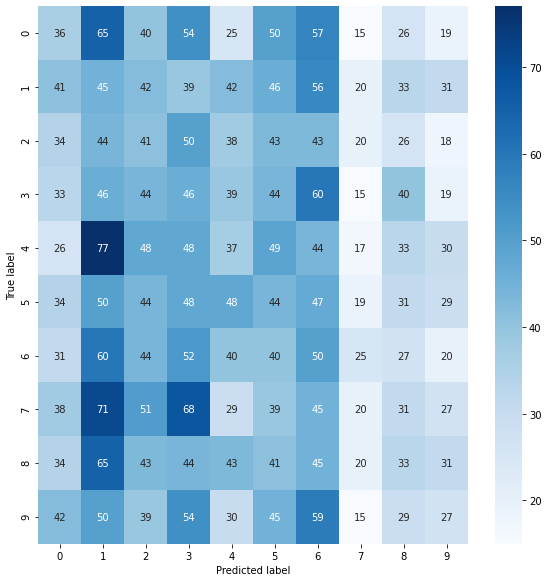

In [ ]:
# plotting confusion matrix
figure = plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Best Performing Classes: 3 and 6

Worst Performing Classes: 7 and 9

**The two most incorrectly classified images for each class in the test dataset.**

In [ ]:
# predicting against validation dataset
predict=dnnModel.predict_generator(val_generator, steps = len(val_generator.filenames))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
predicted_class_indices=np.argmax(predict,axis=1)
labels = (val_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
# creating a list of dictionary, which will store - <key - image path : value - predicted value>
fileName_Value_Dictionary = {}
class_based_Collection = []
previous_class_label = list(val_generator.class_indices.keys())[0]
for idx in range(len(val_generator.filenames)):
  if (val_generator.labels[idx]!=predicted_class_indices[idx]):
    if (previous_class_label == val_generator.filenames[idx].split('/')[0]):
      fileName_Value_Dictionary[val_generator.filenames[idx]] = predict[idx][val_generator.labels[idx]]
    elif ((previous_class_label != val_generator.filenames[idx].split('/')[0])):
      class_based_Collection.append(fileName_Value_Dictionary)
      previous_class_label = val_generator.filenames[idx].split('/')[0]
      fileName_Value_Dictionary = {}
      fileName_Value_Dictionary[val_generator.filenames[idx]] = predict[idx][val_generator.labels[idx]]

class_based_Collection.append(fileName_Value_Dictionary)

n01440764/n01440764_3712.JPEG  -->  0.00032172387
n01440764/n01440764_9020.JPEG  -->  0.0004137963


<Figure size 720x720 with 0 Axes>

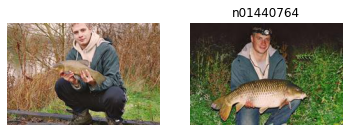

n02102040/n02102040_5170.JPEG  -->  0.00086401316
n02102040/n02102040_761.JPEG  -->  0.00095232617


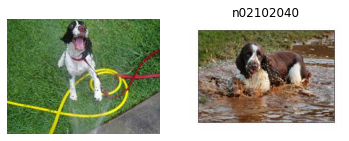

n02979186/n02979186_6882.JPEG  -->  1.3913899e-06
n02979186/n02979186_2981.JPEG  -->  0.00018880547


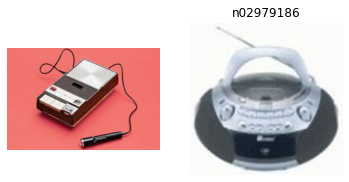

n03000684/n03000684_15932.JPEG  -->  0.00042737834
n03000684/n03000684_1122.JPEG  -->  0.00065036566


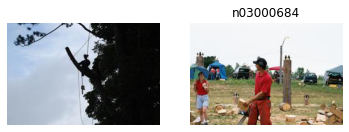

n03028079/n03028079_8132.JPEG  -->  0.0008107863
n03028079/n03028079_3081.JPEG  -->  0.0011719271


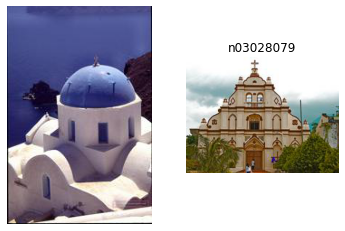

n03394916/n03394916_180.JPEG  -->  0.000110422065
n03394916/n03394916_40160.JPEG  -->  0.00027158554


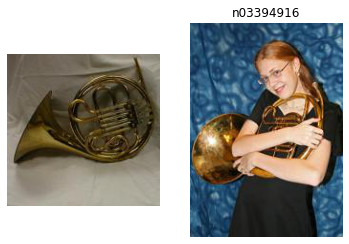

n03417042/n03417042_9620.JPEG  -->  0.0008454853
n03417042/n03417042_18072.JPEG  -->  0.0008963144


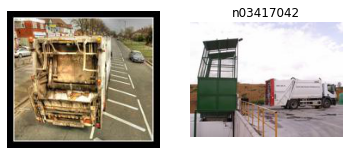

n03425413/n03425413_25410.JPEG  -->  0.00013196911
n03425413/n03425413_20360.JPEG  -->  0.00025537287


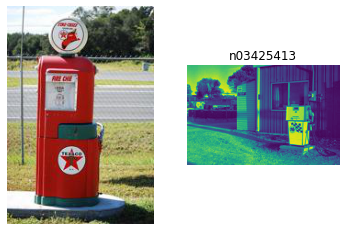

n03445777/n03445777_461.JPEG  -->  0.0017884381
n03445777/n03445777_2070.JPEG  -->  0.00335154


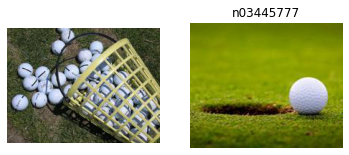

n03888257/n03888257_6662.JPEG  -->  0.0024553838
n03888257/n03888257_64711.JPEG  -->  0.0028597955


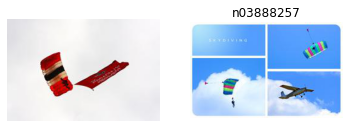

In [ ]:
# plotting the two worst performing image for each class along with their values
plt.figure(figsize=(10, 10))
for index in range(len(class_based_Collection)):
  sortedData = sorted(class_based_Collection[index].items(), key=operator.itemgetter(1))
  key_1 = sortedData[0][0]
  value_1 = sortedData[0][1]
  key_2 = sortedData[1][0]
  value_2 = sortedData[1][1]
  filePath_1 = pathlib.Path(val_dir/key_1)
  filePath_2 = pathlib.Path(val_dir/key_2)
  image_1 = mpimg.imread(filePath_1)
  image_2 = mpimg.imread(filePath_2)
  figure = plt.figure()
  print(key_1, " --> ", value_1)
  figure.add_subplot(1, 2, 1)
  plt.imshow(image_1), plt.axis("off")
  print(key_2, " --> ", value_2)
  figure.add_subplot(1, 2, 2)
  plt.imshow(image_2), plt.axis("off")
  plt.title(class_names[index])
  plt.show()

## HyperParameter Tuning

**1. Change in Dropout Layer Order**

In [ ]:
# Create a model object
dnnModel_Dropout = models.Sequential()
# Layer 1 = Flatten layer whose role is to convert each input image to a 1D array
dnnModel_Dropout.add(keras.layers.Flatten(input_shape=[img_height,img_width, 3]))
# Layer 2 = input layer
# specify the input size in the first layer.
dnnModel_Dropout.add(layers.Dense(1024, activation='relu'))

# Layer 3 = hidden layer 
dnnModel_Dropout.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)) )

# Layer 4 = hidden layer 
dnnModel_Dropout.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)) )

# Add dropout of 20% to layer 4
dnnModel_Dropout.add(layers.Dropout(0.2))

# Layer 5 = hidden layer 
dnnModel_Dropout.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)) )

# Layer 6 = output layer
dnnModel_Dropout.add(layers.Dense(10, activation='softmax'))

dnnModel_Dropout.summary()

dnnModel_Dropout.compile( optimizer = keras.optimizers.Adam(lr = 0.001), loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False), metrics=['accuracy'] )

dnnModel_Dropout.fit_generator(
    generator=train_generator,
    steps_per_epoch=STEP_SIZE_TRAIN,
    validation_data=val_generator,
    validation_steps=STEP_SIZE_VALID,
    epochs=50
)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 76800)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              78644224  
_________________________________________________________________
dense_6 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
295/295 [==============================] - 71s 239ms/step - loss: 14.1833 - accuracy: 0.1412 - val_loss: 5.4458 - val_accuracy: 0.1957
Epoch 2/50
295/295 [==============================] - 73s 247ms/step - loss: 5.1521 - accuracy: 0.2220 - val_loss: 4.5017 - val_accuracy: 0.2505
Epoch 3/50
295/295 [==============================] - 75s 253ms/step - loss: 4.3450 - accuracy: 0.2554 - val_loss: 3.8368 - val_accuracy: 0.2725
Epoch 4/50
295/295 [==============================] - 74s 250ms/step - loss: 3.7631 - accuracy: 0.2772 - val_loss: 3.3475 - val_accuracy: 0.3212
Epoch 5/50
295/295 [==============================] - 73s 247ms/step - loss: 3.3275 - accuracy: 0.2891 - val_loss: 2.9991 - val_accuracy: 0.3466
Epoch 6/50
295/295 [==============================] - 74s 250ms/step - loss: 3.0038 - accuracy: 0.3037 - val_loss: 2.7193 - val_accuracy: 0.3568
Epoch 7/50
295/295 [==============================] - 74s 251ms/step - loss: 2.7467 - accuracy: 0.3177 - val_loss: 2.4895 - val_a

**2. Training model without regularization**

In [ ]:
# Create a model object
dnnModel_Regularization = models.Sequential()
# Layer 1 = Flatten layer whose role is to convert each input image to a 1D array
dnnModel_Regularization.add(keras.layers.Flatten(input_shape=[img_height,img_width, 3]))
# Layer 2 = input layer
# specify the input size in the first layer.
dnnModel_Regularization.add(layers.Dense(1024, activation='relu'))

# Add dropout of 20% to layer 1
dnnModel_Regularization.add(layers.Dropout(0.2))

# Layer 3 = hidden layer 
dnnModel_Regularization.add(layers.Dense(512, activation='relu') )

# Layer 4 = hidden layer 
dnnModel_Regularization.add(layers.Dense(256, activation='relu') )

# Layer 5 = hidden layer 
dnnModel_Regularization.add(layers.Dense(128, activation='relu') )

# Layer 6 = output layer
dnnModel_Regularization.add(layers.Dense(10, activation='softmax'))

dnnModel_Regularization.summary()

dnnModel_Regularization.compile( optimizer = keras.optimizers.Adam(lr = 0.001), loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False), metrics=['accuracy'] )

dnnModel_Regularization.fit_generator(
    generator=train_generator,
    steps_per_epoch=STEP_SIZE_TRAIN,
    validation_data=val_generator,
    validation_steps=STEP_SIZE_VALID,
    epochs=50
)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 76800)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              78644224  
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_12 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_13 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_14 (Dense)             (None, 10)               

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
295/295 [==============================] - 71s 239ms/step - loss: 10.6424 - accuracy: 0.1379 - val_loss: 2.0932 - val_accuracy: 0.2482
Epoch 2/50
295/295 [==============================] - 70s 238ms/step - loss: 2.1969 - accuracy: 0.2036 - val_loss: 2.0875 - val_accuracy: 0.2518
Epoch 3/50
295/295 [==============================] - 70s 238ms/step - loss: 2.1359 - accuracy: 0.2241 - val_loss: 2.0368 - val_accuracy: 0.2756
Epoch 4/50
295/295 [==============================] - 70s 238ms/step - loss: 2.1205 - accuracy: 0.2273 - val_loss: 2.0376 - val_accuracy: 0.2774
Epoch 5/50
295/295 [==============================] - 70s 238ms/step - loss: 2.1016 - accuracy: 0.2455 - val_loss: 1.9963 - val_accuracy: 0.2997
Epoch 6/50
295/295 [==============================] - 70s 237ms/step - loss: 2.0600 - accuracy: 0.2611 - val_loss: 1.9628 - val_accuracy: 0.3286
Epoch 7/50
295/295 [==============================] - 70s 239ms/step - loss: 2.0548 - accuracy: 0.2643 - val_loss: 1.9584 - val_a

**Comparison of Model Results:**

**Basic Model (dnnModel) Vs Model with Change in Dropout (dnnModel_Dropout)**

For `dnnModel` (Baic Model) - \
Training Accuracy: 39.90% \
Test Accuracy: 42.62% \

For `dnnModel_Dropout` (Model with change in dropoout layer position) - \
Training Accuracy: 43.65% \
Test Accuracy 41.73% \

**Observation is as follows:**

In case of position change of dropout layer (keeping dropout value same as 0.20) between dense layers having less parameters, causes to drop less neurons which in turn makes the model perform better only in case of training data however, it is quite noticable that Test Accuracy got decreased. \
Thus, we can say dropout layer position after `layer 4` is a not a better position since it is taking the model towards `overfitting`. \

**Basic Model (dnnModel) Vs Model without Regularization (dnnModel_Regularization)**

For `dnnModel` (Basic Mode) - \
Training Accuracy: 39.90% \
Test Accuracy: 42.62% \

For `dnnModel_Regularization` (Model without regularization value) - \
Training Accuracy: 36.15% \
Test Accuracy 38.86% \

Again, based on the above results we can see that the model without regularization value is not performing better, rather we can see the Training and test accuracy started falling after same number of epochs.

## **Final observations**
Higher test accuracy of `dnnModel` (which is our basic model) indicates that there is scope for improvement in test accuracy for `dnnModel` (Basic Model) by increasing the number of epochs.